In [4]:
# Importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import math

### DATA EXPLORATION

In [5]:
# URL mentah dari file CSV di GitHub
url = 'https://raw.githubusercontent.com/gisrusdi/FGA_digitalent/main/Clean_Dataset.csv'
df = pd.read_csv(url, usecols=lambda column: column != 'Unnamed: 0')

df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
# Exploring and Summarizing Data Distributions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
print(round(df.describe()),2)

       duration  days_left     price
count  300153.0   300153.0  300153.0
mean       12.0       26.0   20890.0
std         7.0       14.0   22698.0
min         1.0        1.0    1105.0
25%         7.0       15.0    4783.0
50%        11.0       26.0    7425.0
75%        16.0       38.0   42521.0
max        50.0       49.0  123071.0 2


Text(0.5, 1.0, 'Price')

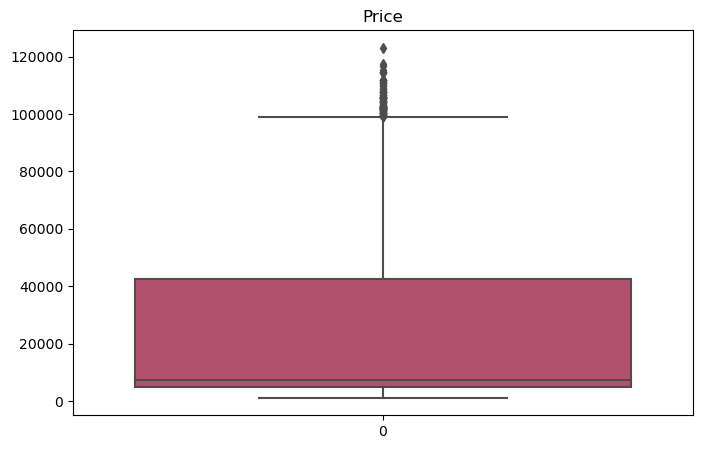

In [9]:
# Visualizing the Distribution of Prices with a Boxplot
plt.figure(figsize=(8,5))
fig = sns.boxplot(data=df['price'],palette="flare")
fig.set_title('Price')

In [10]:
df['price'].min()

1105

### PREPROCESSING DATA

In [11]:
# Creating a Copy of the Original DataFrame
df_raw = df.copy()

In [12]:
# Converting 'class' Feature to Binary : Economy (0) Business (1)
df['class'] = df['class'].map({'Economy': 0, 'Business': 1})

In [13]:
# Converting Categorical 'stops' Feature to Numerical
df['stops'] = pd.factorize(df['stops'])[0]

In [14]:
# Label Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

categorical_cols = ['airline', 'flight', 'source_city', 'departure_time',
                    'arrival_time', 'destination_city']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [15]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,0,5,5,0,2.17,1,5953
1,4,1387,2,1,0,4,5,0,2.33,1,5953
2,0,1213,2,1,0,1,5,0,2.17,1,5956
3,5,1559,2,4,0,0,5,0,2.25,1,5955
4,5,1549,2,4,0,4,5,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,1,2,3,1,10.08,49,69265
300149,5,1481,1,0,1,5,3,1,10.42,49,77105
300150,5,1486,1,1,1,5,3,1,13.83,49,79099
300151,5,1483,1,1,1,2,3,1,10.00,49,81585


In [16]:
# One hot encode

#df = df.join(pd.get_dummies(df.airline, prefix='airline', dtype=int)).drop('airline', axis=1)
#df = df.join(pd.get_dummies(df.source_city, prefix='source', dtype=int)).drop('source_city', axis=1)
#df = df.join(pd.get_dummies(df.destination_city, prefix='destination', dtype=int)).drop('destination_city', axis=1)
#df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival', dtype=int)).drop('arrival_time', axis=1)
#df = df.join(pd.get_dummies(df.departure_time, prefix='departure', dtype=int)).drop('departure_time', axis=1)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(6), int64(4)
memory usage: 18.3 MB


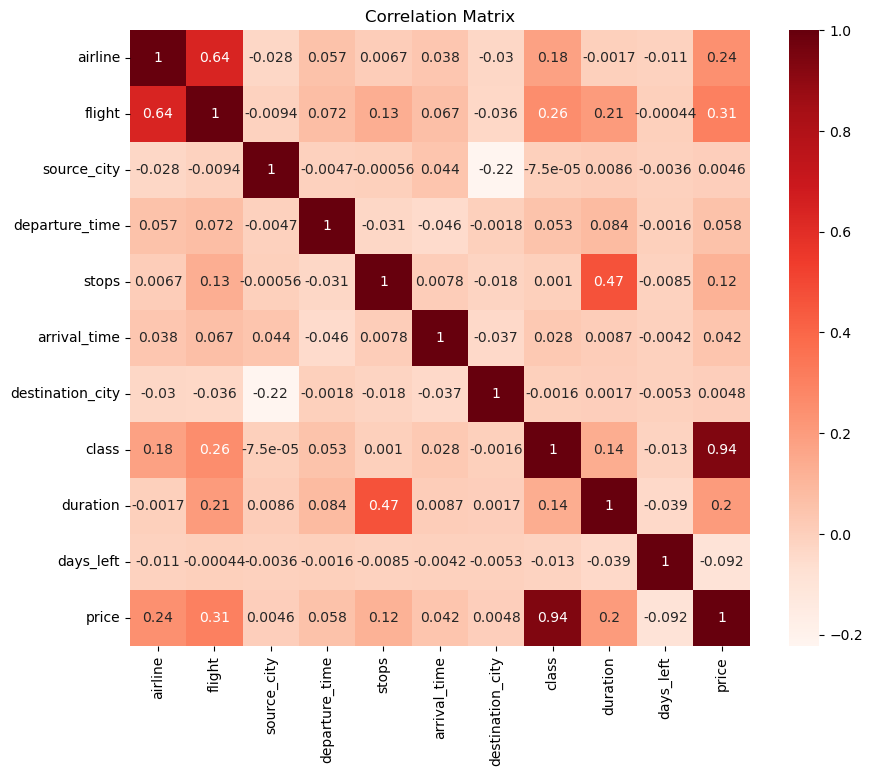

In [18]:
# DataFrame Correlation Matrix Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Matrix')
plt.show()

### TRAINING REGRESSION MODEL

In [19]:
# Preparing Data for Random Forest Regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [20]:
X, y = df.drop('price', axis=1), df['price']

In [21]:
# Splitting Data into Training and Testing Sets (20% testing and 80% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
# Data Modeling
reg = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1)

reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1)

### EVALUATING DATA

In [25]:
# Making Predictions with the Regression Model on Test Data
y_pred = reg.predict(X_test)

In [26]:
# Calculating and Displaying Regression Model Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    nonzero = y_true != 0
    return np.mean(np.abs((y_true[nonzero] - y_pred[nonzero]) / y_true[nonzero])) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 2185.74
MSE: 15278746.04
R-squared: 0.97
MAPE: 15.91%


In [27]:
# Creating a DataFrame for Actual vs. Predicted Prices and Errors
comparison_df = pd.DataFrame({
    'Actual_Price': y_test,
    'Predicted_Price': y_pred,
    'Absolute_Error': np.abs(y_test - y_pred),
})

comparison_df

,Actual_Price,Predicted_Price,Absolute_Error
143563,6489,6838.318193,349.318193
210851,59033,56848.856199,2184.143801
181255,11448,12859.038285,1411.038285
3126,10907,5806.063028,5100.936972
46824,6122,5359.760333,762.239667
...,...,...,...
212612,52522,51779.721623,742.278377
102500,5771,5277.443240,493.556760
51557,6867,5623.428674,1243.571326
211223,34472,35038.902341,566.902341


In [28]:
# Calculating and Displaying Minimum and Maximum Absolute Errors
min_abs = comparison_df['Absolute_Error'].min()
max_abs = comparison_df['Absolute_Error'].max()

print(f'Min Absolute Error: {min_abs:.2f}')
print(f'Max Absolute Error: {max_abs:.2f}')

Min Absolute Error: 0.00
Max Absolute Error: 51833.85


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


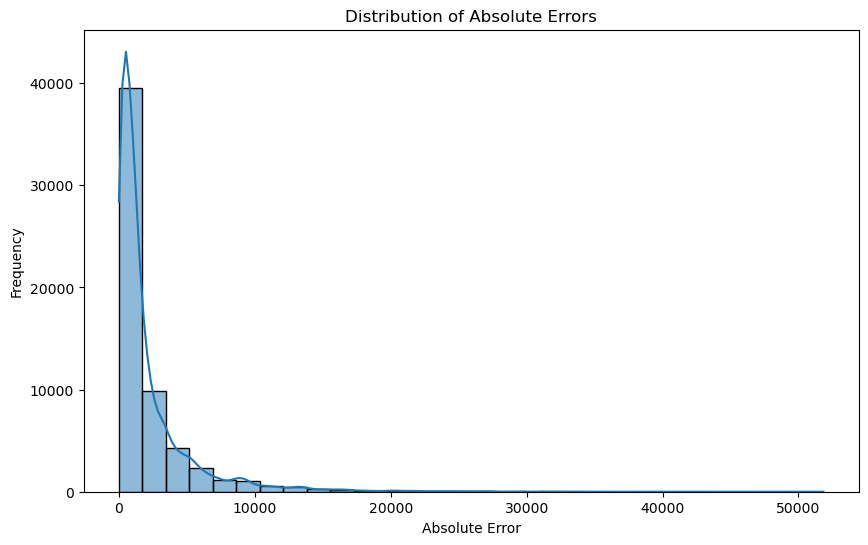

In [29]:
# Visualizing the Distribution of Absolute Errors
plt.figure(figsize=(10, 6))
sns.histplot(comparison_df['Absolute_Error'], bins=30, kde=True)
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute Errors')
plt.show()

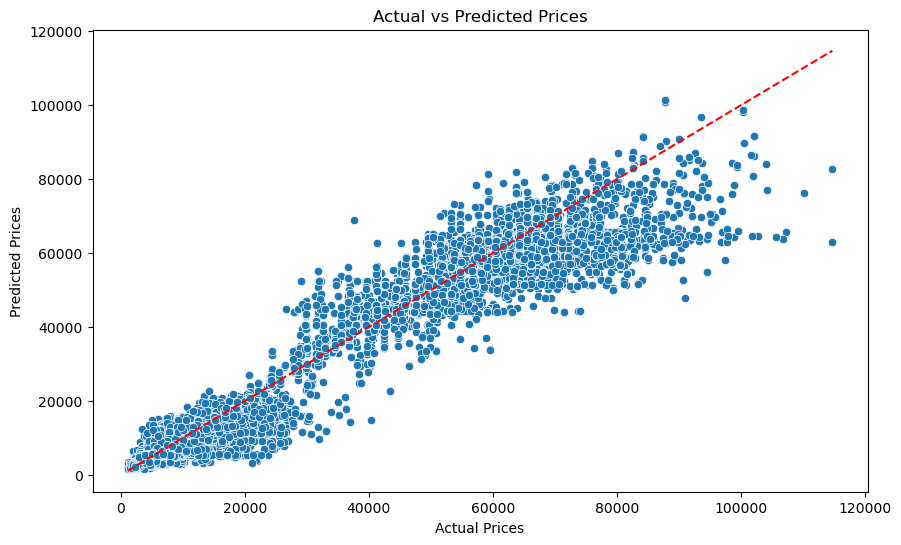

In [30]:
# Scatter Plot of Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

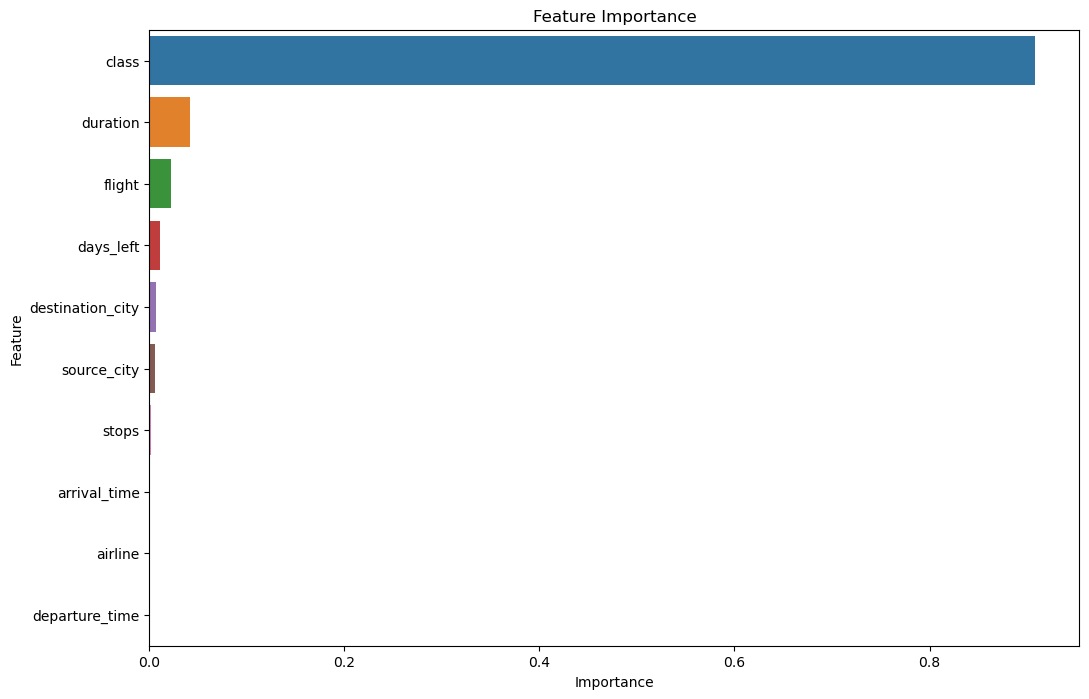

In [31]:
# Bar Plot of Feature Importances from the Regression Model
importances = reg.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [34]:
import joblib

joblib.dump(reg, 'flight_model.pkl', compress=3)

['flight_model.pkl']

## Streamlit

In [3]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Muat model
model = joblib.load('flight_model.pkl')

# Muat data untuk mendapatkan varian lain
df = pd.read_csv("Clean_Dataset.csv", usecols=lambda column: column != 'Unnamed: 0')

# Preprocessing fungsi untuk variabel input
def preprocess(df):
    df['class'] = df['class'].map({'Economy': 0, 'Business': 1})
    df['stops'] = pd.factorize(df['stops'])[0]
    categorical_cols = ['airline', 'flight', 'source_city', 'departure_time', 'arrival_time', 'destination_city']
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    return df, label_encoders

# Preprocessing data
df, label_encoders = preprocess(df)

# Fungsi untuk prediksi
def predict(model, input_data):
    return model.predict(input_data)

# Filter data berdasarkan input pengguna
source_city = 'Delhi'
destination_city = 'Mumbai'
days_left = 3

filtered_df = df[(df['source_city'] == label_encoders['source_city'].transform([source_city])[0]) & 
                 (df['destination_city'] == label_encoders['destination_city'].transform([destination_city])[0])]

# Batasi jumlah kombinasi dengan mengambil sampel
def generate_combinations(filtered_df, days_left, sample_size=10):
    airlines = filtered_df['airline'].unique()
    flights = filtered_df['flight'].unique()
    departure_times = filtered_df['departure_time'].unique()
    arrival_times = filtered_df['arrival_time'].unique()
    classes = [0, 1]  # 0: Economy, 1: Business
    stops = filtered_df['stops'].unique()
    durations = filtered_df['duration'].unique()

    # Ambil sampel dari setiap variabel untuk mengurangi jumlah kombinasi
    airlines = pd.Series(airlines).sample(min(sample_size, len(airlines)), replace=True).unique()
    flights = pd.Series(flights).sample(min(sample_size, len(flights)), replace=True).unique()
    departure_times = pd.Series(departure_times).sample(min(sample_size, len(departure_times)), replace=True).unique()
    arrival_times = pd.Series(arrival_times).sample(min(sample_size, len(arrival_times)), replace=True).unique()
    stops = pd.Series(stops).sample(min(sample_size, len(stops)), replace=True).unique()
    durations = pd.Series(durations).sample(min(sample_size, len(durations)), replace=True).unique()

    combinations = pd.DataFrame([
        [airline, flight, label_encoders['source_city'].transform([source_city])[0], departure_time, stop, arrival_time, 
         label_encoders['destination_city'].transform([destination_city])[0], class_type, duration, days_left]
        for airline in airlines
        for flight in flights
        for departure_time in departure_times
        for arrival_time in arrival_times
        for class_type in classes
        for stop in stops
        for duration in durations
    ], columns=['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left'])

    return combinations

# Konversi input ke dataframe
input_data = generate_combinations(filtered_df, days_left)

# Lakukan prediksi
batch_size = 1000
predictions = []

for i in range(0, len(input_data), batch_size):
    batch = input_data.iloc[i:i + batch_size]
    predictions.extend(predict(model, batch))

input_data['predicted_price'] = predictions
sorted_data = input_data.sort_values(by='predicted_price')

# Fungsi untuk decoding hasil prediksi
def decode_results(df, label_encoders):
    for col, le in label_encoders.items():
        df[col] = le.inverse_transform(df[col])
    df['class'] = df['class'].map({0: 'Economy', 1: 'Business'})
    return df

# Decode hasil prediksi ke bentuk string
decoded_data = decode_results(sorted_data.copy(), label_encoders)

# Tampilkan hasil
print("Estimated Flight Prices (sorted by cheapest):")
print(decoded_data.head(100))


Estimated Flight Prices (sorted by cheapest):
         airline   flight source_city departure_time  stops arrival_time  \
10529  Air_India  G8-7534       Delhi          Night      2      Morning   
10649  Air_India  G8-7534       Delhi          Night      2        Night   
28529    AirAsia  G8-7534       Delhi          Night      2      Morning   
28649    AirAsia  G8-7534       Delhi          Night      2        Night   
10709  Air_India  G8-7534       Delhi          Night      2   Late_Night   
...          ...      ...         ...            ...    ...          ...   
10342  Air_India  G8-7534       Delhi        Morning      2        Night   
11549  Air_India   I5-775       Delhi          Night      2        Night   
29249    AirAsia   I5-775       Delhi        Morning      2        Night   
28647    AirAsia  G8-7534       Delhi          Night      2        Night   
28345    AirAsia  G8-7534       Delhi        Morning      2        Night   

      destination_city    class  duration